In [1]:
import pandas as pd
import datetime

In [2]:
items = ['iphone x', 'iphone 6', 'galaxy s9', 'sony wh-1000xm3']
releases = ['03-11-2017', '19-09-2014', '16-03-2018', '09-10-2018']

In [3]:
df = pd.read_csv('data/yt_tech_channels_metadata.tsv.gz', compression="infer", sep="\t")
items_df = {product_name: [] for product_name in items}

In [4]:
df

,Unnamed: 0,categories,channel_id,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,tech_review,num_comms,clean_title,clean_tags
0,0,Science & Technology,UCzVy1DW9NFp4c910hMd_jIw,0.0,1m8g3JLXh3U,498,36.0,"iFi,Headphone,Headphone Amp,DAC,Digital to Ana...",iFi Headphone Amp and DAC Lineup Review,2019-09-27,1050.0,False,2.0,"['ifi', 'headphone', 'amp', 'dac', 'lineup', '...","['ifi', 'headphone', 'headphone', 'amp', 'dac'..."
1,1,Science & Technology,UCzVy1DW9NFp4c910hMd_jIw,1.0,gPB8IxkaIeI,115,12.0,NaN,Raleigh-Durham eCommerce Meetup Recap,2019-09-27,222.0,False,0.0,"['raleigh', 'durham', 'ecommerce', 'meetup', '...",[]
2,2,Science & Technology,UCzVy1DW9NFp4c910hMd_jIw,2.0,mgnAMH80Q_U,507,74.0,"pro-ject,pro-ject turntables,pro-ject turntabl...",Pro-Ject T1 Turntable Review,2019-09-25,4120.0,False,12.0,"['pro', 'ject', 'turntable', 'review']","['pro', 'ject', 'pro', 'ject', 'turntable', 'p..."
3,3,Science & Technology,UCzVy1DW9NFp4c910hMd_jIw,34.0,izzlMMHvPIE,420,255.0,"Bowers & Wilkins,Bowers & Wilkins PX,Bowers & ...",Bowers & Wilkins PX 7 vs. Bose Noise Cancellin...,2019-09-24,16854.0,False,116.0,"['bower', 'wilkins', 'px', 'bose', 'noise', 'c...","['bower', 'wilkins', 'bower', 'wilkins', 'px',..."
4,4,Science & Technology,UCzVy1DW9NFp4c910hMd_jIw,9.0,UdxpNgNLYfk,220,130.0,"Bowers & Wilkins,Bowers & Wilkins PX,Bowers & ...",FIRST LOOK!! Bowers & Wilkins P Series Headpho...,2019-09-20,10767.0,False,44.0,"['first', 'look', 'bower', 'wilkins', 'series'...","['bower', 'wilkins', 'bower', 'wilkins', 'px',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740013,740013,Science & Technology,UCrxStpzUb40yGqo_EaI972g,0.0,8IKgARICTOk,227,0.0,"Increase Internet Speed,Block Unnecessary Apps...",Increase Internet Speed : Block Unnecessary Ap...,2017-07-05,8.0,False,0.0,"['increase', 'internet', 'speed', 'block', 'un...","['increase', 'internet', 'speed', 'block', 'un..."
740014,740014,Science & Technology,UCrxStpzUb40yGqo_EaI972g,52.0,AI-aaZz9ULQ,552,246.0,"How to Download Lynda Tutorials For Free,FULL ...",How to Download Lynda Tutorials For Free - FUL...,2017-03-06,53577.0,False,90.0,"['download', 'lynda', 'tutorial', 'free', 'ful...","['download', 'lynda', 'tutorial', 'free', 'ful..."
740015,740015,Science & Technology,UCrxStpzUb40yGqo_EaI972g,2.0,fx_ERvJFQcU,408,0.0,How To Compress Video For Youtube Without Losi...,How To Compress Video For Youtube Without Losi...,2017-03-05,468.0,False,0.0,"['compress', 'video', 'youtube', 'without', 'l...","['compress', 'video', 'youtube', 'without', 'l..."
740016,740016,Science & Technology,UCrxStpzUb40yGqo_EaI972g,41.0,3SodCZoI_l4,167,217.0,"How To Download Google Drive File With IDM,How...",How To Download Google Drive File With IDM On ...,2017-03-02,31778.0,False,135.0,"['download', 'google', 'drive', 'file', 'idm',...","['download', 'google', 'drive', 'file', 'idm',..."


In [10]:
# remove the columns 'num_comms', 'clean_tags'
df = df.drop(columns=['num_comms', 'clean_tags'])

In [17]:
for product_name, release_date in zip(items, releases):
    # change type of title to str
    df['title'] = df['title'].astype(str)
    item_df = df[df['title'].str.contains(product_name, case=False)]

    item_df["upload_date"] = pd.to_datetime(df["upload_date"])
    item_df = item_df[(item_df['upload_date'] >= datetime.datetime.strptime(release_date, '%d-%m-%Y') - datetime.timedelta(days=180)) & (item_df['upload_date'] <= datetime.datetime.strptime(release_date, '%d-%m-%Y') + datetime.timedelta(days=180))]

    if len(item_df) > 0:
        items_df[product_name].append(item_df)
    
for product_name in items:
    items_df[product_name] = pd.concat(items_df[product_name])

/var/folders/zj/sr110gkn1vz4qf70llfwlh8c0000gn/T/ipykernel_2698/3714527949.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_df["upload_date"] = pd.to_datetime(df["upload_date"])
/var/folders/zj/sr110gkn1vz4qf70llfwlh8c0000gn/T/ipykernel_2698/3714527949.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_df["upload_date"] = pd.to_datetime(df["upload_date"])
/var/folders/zj/sr110gkn1vz4qf70llfwlh8c0000gn/T/ipykernel_2698/3714527949.py:6: SettingWithCopyWarning: 
A value is trying to be set on a c

***

### Pre-release topics

In [23]:
topic = ["leak", "unboxing", "prototype", "new", "secret"]
iphone_df = items_df["iphone x"]
print(iphone_df.shape)

(3621, 13)


In [11]:
def views_per_day(df):
    df = df.copy()
    df["upload_date"] = pd.to_datetime(df["upload_date"])
    df = df[['upload_date', 'view_count']]
    # group by upload date and sum views
    df = df.groupby("upload_date").sum()
    return df

In [12]:
df_views = views_per_day(df)
df_views

,view_count
upload_date,
2006-01-16,434454.0
2006-02-26,430991.0
2006-03-16,599.0
2006-03-20,1847.0
2006-03-23,9992.0
...,...
2019-09-29,18480399.0
2019-09-30,75693189.0
2019-10-01,36641564.0


In [ ]:
def views_product(df_product, df):
    df_product = df_product.copy()
    product_views = views_per_day(df_product)
    youtube_views = views_per_day(df)
    product_views = product_views.merge(youtube_views, on="upload_date")
    # remove rows with nans
    product_views = product_views.dropna()
    # calculate views per day
    product_views["views_per_day"] = product_views["view_count_x"] / product_views["view_count_y"]
    return product_views

In [25]:
# keep only rows that contain all of the words in one of the topics
pre_iphone_df = iphone_df[iphone_df['title'].str.contains('|'.join([word for word in topic]), case=False)]
print(pre_iphone_df.shape)

(516, 13)


In [ ]:
# Suppose now we have two dataframes:
# video_df: ['channel_id', 'title', 'upload_date']
# channel_df: ['channel', 'datetime', 'views', 'delta_views', 'subs', 'delta_subs']

In [32]:
channels_df = pd.read_csv('data/df_timeseries_en.tsv', sep="\t")

In [33]:
channels_df

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0
...,...,...,...,...,...,...,...,...,...,...
18872494,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-02 00:00:00,6.012938e+06,232418.277778,61268.611111,1305.611111,278,2,10
18872495,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-09 00:00:00,6.244579e+06,231640.888889,62631.666667,1363.055556,287,9,13
18872496,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-16 00:00:00,6.480902e+06,236322.933333,64010.000000,1378.333333,294,7,16
18872497,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-23 00:00:00,6.745317e+06,264415.200000,65480.000000,1470.000000,301,7,15


In [191]:
# merge the two dataframes channels_df and pre_iphone_df on channel_id and channel and only keep rows where channel_id is not null
df = pd.merge(channels_df, pre_iphone_df, how='inner', left_on='channel', right_on='channel_id')
df = df[df['channel_id'].notnull()]

In [192]:

# remove rows where 'upload_date' < 'datetime'
df = df[df['upload_date'] >= df['datetime']]
df = df[['datetime', 'delta_views', 'delta_subs', 'views', 'subs']]

# remove rows having a nan in any of the columns
df = df.dropna()

# take ratio of delta_views to views
df['ratio_views'] = df['delta_views'] / df['views']

# take ratio of delta_subs to subs
df['ratio_subs'] = df['delta_subs'] / df['subs']

# group by datetime and take the average of delta_views and delta_subs
df = df.groupby('datetime').mean()



# take a moving average of the delta_views and delta_subs
df['ratio_views'] = df['ratio_views'].rolling(window=10).mean()
df['ratio_subs'] = df['ratio_subs'].rolling(window=10).mean()
df['subs'] = df['subs'].rolling(window=10).mean()

df = df.dropna()

In [193]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Sample time series data (replace this with your own data)
data = {'Date': df.index,
        'Value': df['ratio_views']}

# Convert each value in 'Date' to datetime format from year-month-day hour:minute:second
data['Date'] = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in data['Date']]

# # keep only dates that are before '03-08-2017' (just the indices)
# indices = [i for i, d in enumerate(data['Date']) if d < datetime.strptime('03-08-2017', '%d-%m-%Y')]
# data['Date'] = [d for i, d in enumerate(data['Date']) if i in indices]
# data['Value'] = [d for i, d in enumerate(data['Value']) if i in indices]


***

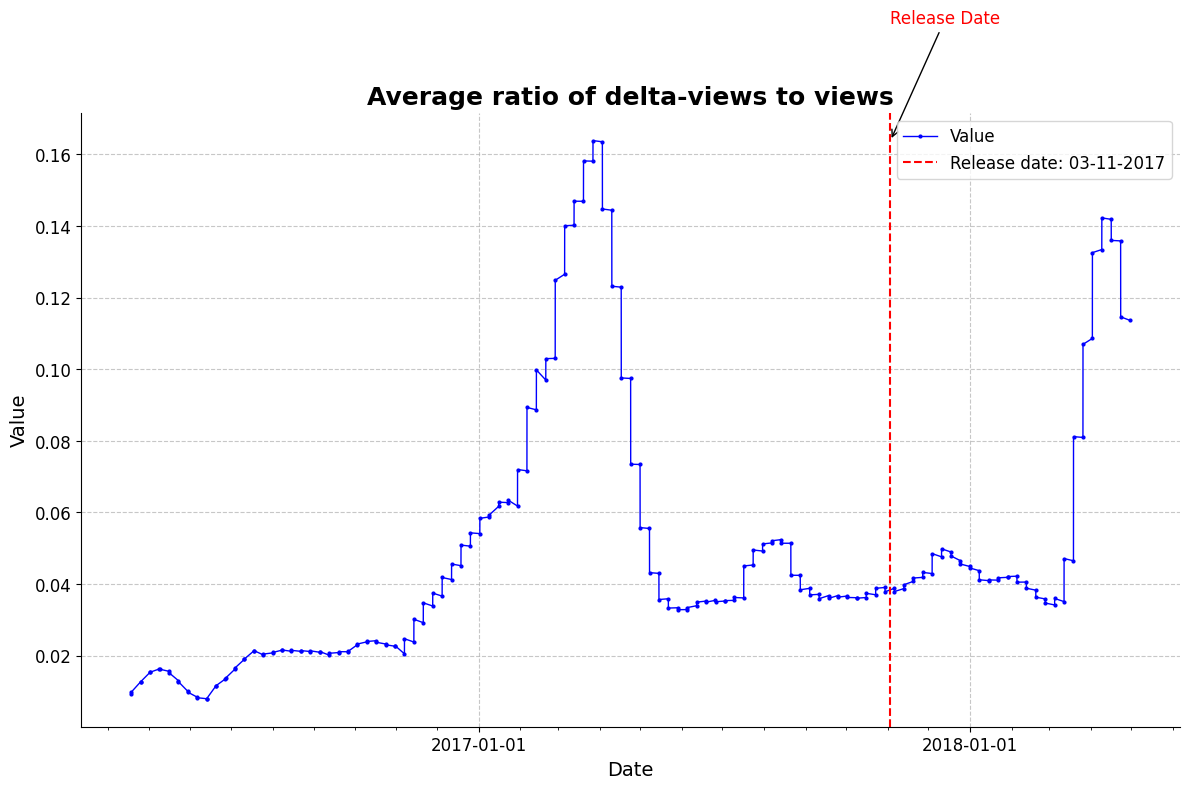

In [194]:
# Create a DataFrame
df_bis = pd.DataFrame(data)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(df_bis['Date'], df_bis['Value'], marker='o', color='b', label='Value', linewidth=1, markersize=2)
plt.axvline(datetime.strptime("03-11-2017", '%d-%m-%Y'), color='red', linewidth=1.5, linestyle='--', label='Release date: 03-11-2017')

# Beautify the plot
plt.title('Average ratio of delta-views to views', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Format date on the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

# Set tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)

# Highlight the release date
plt.annotate('Release Date', xy=(datetime.strptime("03-11-2017", '%d-%m-%Y'), df_bis['Value'].max()), 
             xytext=(datetime.strptime("03-11-2017", '%d-%m-%Y'), df_bis['Value'].max() * 1.2),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=12, color='red')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Auto format the layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


In [195]:
subs_data = {'Date': df.index,
        'Value': df['ratio_subs']}

# Convert each value in 'Date' to datetime format from year-month-day hour:minute:second
subs_data['Date'] = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in subs_data['Date']]

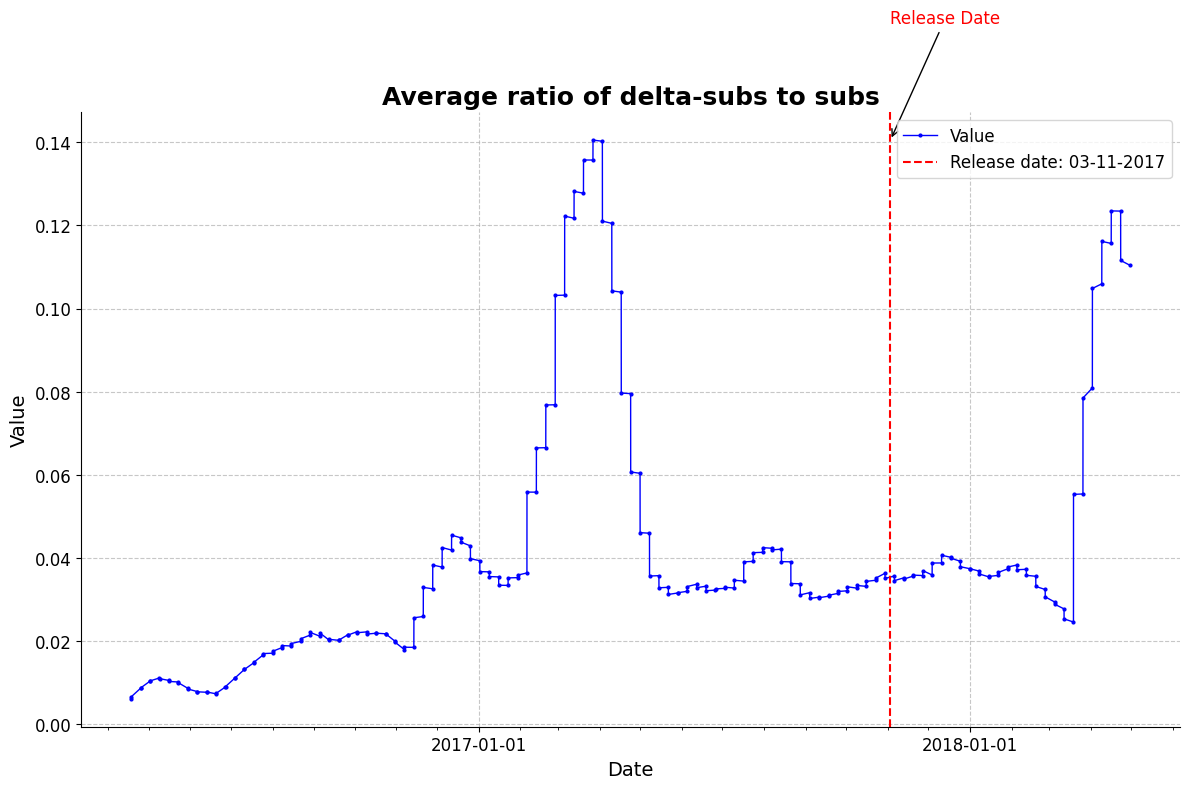

In [196]:
# Create a DataFrame
df_bis = pd.DataFrame(subs_data)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(df_bis['Date'], df_bis['Value'], marker='o', color='b', label='Value', linewidth=1, markersize=2)
plt.axvline(datetime.strptime("03-11-2017", '%d-%m-%Y'), color='red', linewidth=1.5, linestyle='--', label='Release date: 03-11-2017')

# Beautify the plot
plt.title('Average ratio of delta-subs to subs', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Format date on the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

# Set tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)

# Highlight the release date
plt.annotate('Release Date', xy=(datetime.strptime("03-11-2017", '%d-%m-%Y'), df_bis['Value'].max()), 
             xytext=(datetime.strptime("03-11-2017", '%d-%m-%Y'), df_bis['Value'].max() * 1.2),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=12, color='red')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Auto format the layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


In [197]:
subs_data = {'Date': df.index,
        'Value': df['subs']}

# Convert each value in 'Date' to datetime format from year-month-day hour:minute:second
subs_data['Date'] = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in subs_data['Date']]

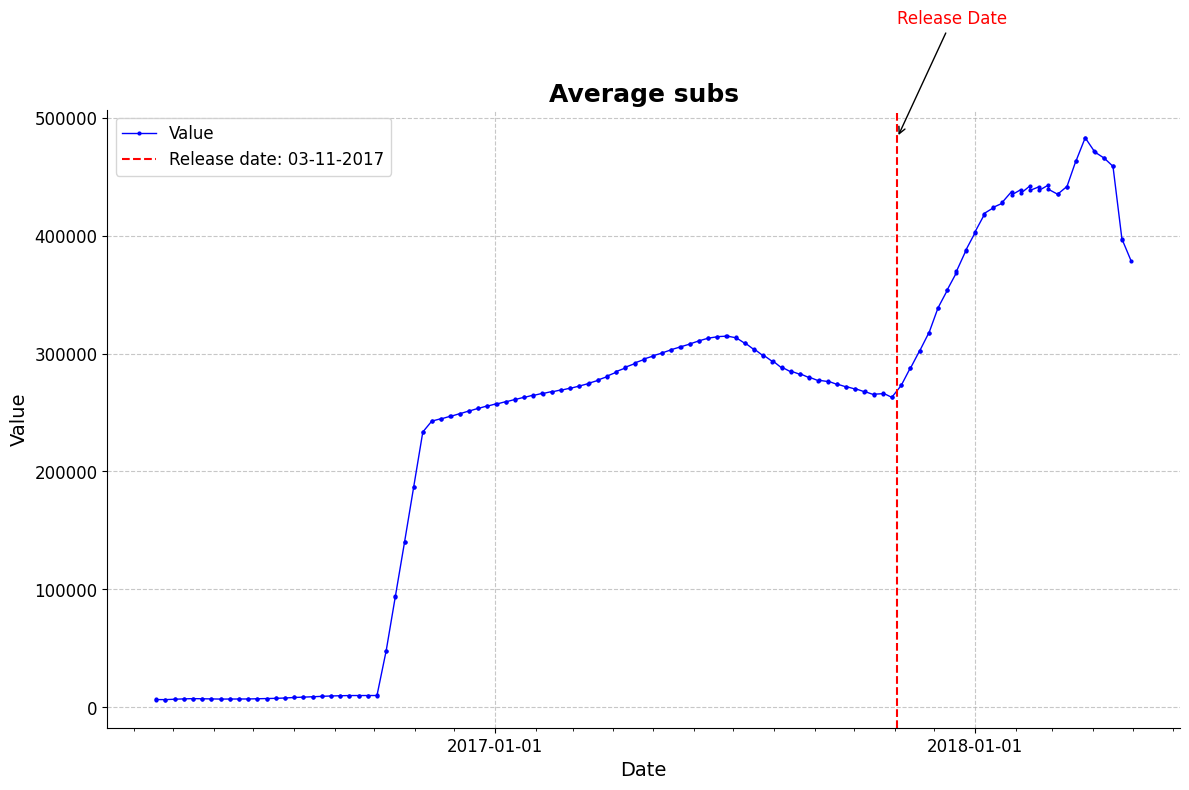

In [198]:
# Create a DataFrame
df_bis = pd.DataFrame(subs_data)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(df_bis['Date'], df_bis['Value'], marker='o', color='b', label='Value', linewidth=1, markersize=2)
plt.axvline(datetime.strptime("03-11-2017", '%d-%m-%Y'), color='red', linewidth=1.5, linestyle='--', label='Release date: 03-11-2017')

# Beautify the plot
plt.title('Average subs', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Format date on the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

# Set tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)

# Highlight the release date
plt.annotate('Release Date', xy=(datetime.strptime("03-11-2017", '%d-%m-%Y'), df_bis['Value'].max()), 
             xytext=(datetime.strptime("03-11-2017", '%d-%m-%Y'), df_bis['Value'].max() * 1.2),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=12, color='red')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Auto format the layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()
